### In this dataset we will explore the details of Noble Prize winners

  > ##### We will try to answer the following questions?

 * Which coutry has most Noble prize winner?
 - In which subject most noble prize granted?
 + Which subject has most  noble laurates?
 * which gender has most noble laurates?
 * In which era most of the noble prize had been granted?
 

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv("nobel_prize_by_winner.csv")

In [3]:
df.head(2)

,index,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,...,diedCity,gender,year,category,overallMotivation,share,motivation,name,city,country
0,0,846,Elinor,Ostrom,8/7/1933,6/12/2012,USA,US,"Los Angeles, CA",USA,...,"Bloomington, IN",female,2009.0,economics,NaN,2.0,"""for her analysis of economic governance, espe...",Indiana University,"Bloomington, IN",USA
1,1,846,Elinor,Ostrom,8/7/1933,6/12/2012,USA,US,"Los Angeles, CA",USA,...,"Bloomington, IN",female,2009.0,economics,NaN,2.0,"""for her analysis of economic governance, espe...",Arizona State University,"Tempe, AZ",USA


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 972 entries, 0 to 971
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              972 non-null    int64  
 1   id                 972 non-null    int64  
 2   firstname          966 non-null    object 
 3   surname            936 non-null    object 
 4   born               946 non-null    object 
 5   died               946 non-null    object 
 6   bornCountry        940 non-null    object 
 7   bornCountryCode    940 non-null    object 
 8   bornCity           938 non-null    object 
 9   diedCountry        601 non-null    object 
 10  diedCountryCode    600 non-null    object 
 11  diedCity           595 non-null    object 
 12  gender             972 non-null    object 
 13  year               966 non-null    float64
 14  category           966 non-null    object 
 15  overallMotivation  16 non-null     object 
 16  share              966 non

In [5]:
# checking the null values
df.isnull().sum()

index                  0
id                     0
firstname              6
surname               36
born                  26
died                  26
bornCountry           32
bornCountryCode       32
bornCity              34
diedCountry          371
diedCountryCode      372
diedCity             377
gender                 0
year                   6
category               6
overallMotivation    956
share                  6
motivation            94
name                 252
city                 258
country              258
dtype: int64

In [6]:
# get the data type of data set
df.dtypes

index                  int64
id                     int64
firstname             object
surname               object
born                  object
died                  object
bornCountry           object
bornCountryCode       object
bornCity              object
diedCountry           object
diedCountryCode       object
diedCity              object
gender                object
year                 float64
category              object
overallMotivation     object
share                float64
motivation            object
name                  object
city                  object
country               object
dtype: object

In [7]:
# get the shape
df.shape

(972, 21)

In [8]:
# statistical details about the dataset
df.describe()

,index,id,year,share
count,972.000000,972.000000,966.000000,966.000000
mean,485.500000,471.365226,1970.145963,2.005176
std,280.736531,275.012711,32.889742,0.930193
min,0.000000,1.000000,1901.000000,1.000000
25%,242.750000,230.750000,1947.000000,1.000000
50%,485.500000,463.500000,1976.000000,2.000000
75%,728.250000,720.250000,1999.000000,3.000000
max,971.000000,934.000000,2016.000000,4.000000


In [9]:
# delete the irrelevant columns index, bornCountryCode, diedCountryCode,overallMotivation
df.drop(["index","bornCountryCode","diedCountryCode","overallMotivation"],axis=1,inplace=True)

In [10]:
df.head(1)

,id,firstname,surname,born,died,bornCountry,bornCity,diedCountry,diedCity,gender,year,category,share,motivation,name,city,country
0,846,Elinor,Ostrom,8/7/1933,6/12/2012,USA,"Los Angeles, CA",USA,"Bloomington, IN",female,2009.0,economics,2.0,"""for her analysis of economic governance, espe...",Indiana University,"Bloomington, IN",USA


In [11]:
# rename the column "name" to "Institue"
df.rename(columns={"name":"Institute"},inplace=True)

In [12]:
df.head(1)

,id,firstname,surname,born,died,bornCountry,bornCity,diedCountry,diedCity,gender,year,category,share,motivation,Institute,city,country
0,846,Elinor,Ostrom,8/7/1933,6/12/2012,USA,"Los Angeles, CA",USA,"Bloomington, IN",female,2009.0,economics,2.0,"""for her analysis of economic governance, espe...",Indiana University,"Bloomington, IN",USA


In [13]:
# join the two columns firstname and surname into one "Name"
df['Name'] = df['firstname']+"-"+df['surname']

In [14]:
# Now delete the [firstname] and [surname] column
df.drop(['firstname','surname'],axis=1,inplace=True)

In [15]:
df.head(2)

,id,born,died,bornCountry,bornCity,diedCountry,diedCity,gender,year,category,share,motivation,Institute,city,country,Name
0,846,8/7/1933,6/12/2012,USA,"Los Angeles, CA",USA,"Bloomington, IN",female,2009.0,economics,2.0,"""for her analysis of economic governance, espe...",Indiana University,"Bloomington, IN",USA,Elinor-Ostrom
1,846,8/7/1933,6/12/2012,USA,"Los Angeles, CA",USA,"Bloomington, IN",female,2009.0,economics,2.0,"""for her analysis of economic governance, espe...",Arizona State University,"Tempe, AZ",USA,Elinor-Ostrom


In [16]:
# reorder the columns
col_names = ["id","Name","gender","born","category","year","country","motivation","share","city","bornCountry","bornCity","diedCountry","diedCity"]
df = df.reindex(columns=col_names)

In [17]:
# fill the Nan values in year and share column 
df[['year','share']] = df[['year','share']].fillna(df[['year','share']].mean())

In [18]:
# and then convert them to int datatype from float
df[['year','share']] = df[['year','share']].astype('int')

In [19]:
df.fillna({"country":"Unknown",
          "city":"Unknown"
          },inplace=True)

In [20]:
df.dropna(inplace=True)

In [21]:
df.isnull().sum()

id             0
Name           0
gender         0
born           0
category       0
year           0
country        0
motivation     0
share          0
city           0
bornCountry    0
bornCity       0
diedCountry    0
diedCity       0
dtype: int64

In [22]:
df.loc[(df.country=="USA")&(df.gender=="female")].count()

id             7
Name           7
gender         7
born           7
category       7
year           7
country        7
motivation     7
share          7
city           7
bornCountry    7
bornCity       7
diedCountry    7
diedCity       7
dtype: int64

In [23]:
################################################################ testing area ###################

In [24]:
#create copy of the dataset
df1 = df.copy()

In [25]:
# now put columns inthe groups
new=df1.groupby(["Name","country","category","year"]).size()

In [26]:
new

Name                              country         category    year
Aage Niels-Bohr                   Denmark         physics     1975    1
Abdus-Salam                       Italy           physics     1979    1
                                  United Kingdom  physics     1979    1
Adolf Friedrich Johann-Butenandt  Germany         chemistry   1939    2
Adolf Otto Reinhold-Windaus       Germany         chemistry   1928    1
                                                                     ..
Wolfgang-Pauli                    USA             physics     1945    1
Yasunari-Kawabata                 Unknown         literature  1968    1
Yitzhak-Rabin                     Unknown         peace       1994    1
Yoichiro-Nambu                    USA             physics     2008    1
Yves-Chauvin                      France          chemistry   2005    1
Length: 516, dtype: int64

In [28]:
a = df.loc[0: , ["Name","category","country"]]
a['Name']

0                 Elinor-Ostrom
1                 Elinor-Ostrom
2          Wangari Muta-Maathai
3      Dorothy Crowfoot-Hodgkin
5            Barbara-McClintock
                 ...           
866               Harold-Pinter
870               Jos_-Saramago
872              Czeslaw-Milosz
873              Naguib-Mahfouz
874                Gônter-Grass
Name: Name, Length: 532, dtype: object

In [31]:
df.columns

Index(['id', 'Name', 'gender', 'born', 'category', 'year', 'country',
       'motivation', 'share', 'city', 'bornCountry', 'bornCity', 'diedCountry',
       'diedCity'],
      dtype='object')

In [50]:
y1= df['country']

In [51]:
y_position = np.arange(len(y1))

In [52]:
x1 = df['category']

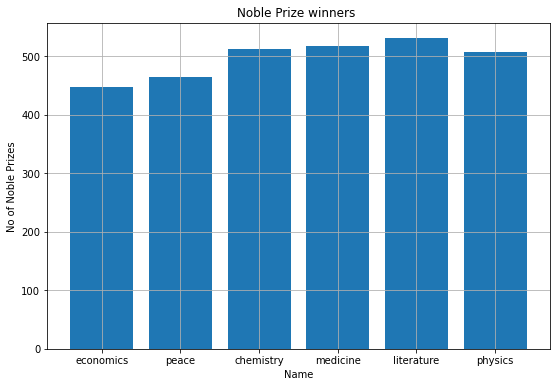

In [82]:
plt.figure(figsize=(9,6))
plt.xlabel("Name")
plt.ylabel("No of Noble Prizes")
plt.title("Noble Prize winners ")
plt.bar(x1,y_position)
plt.grid()
plt.show()

#### Pie Chart

In [72]:
countries = df['country']
no_of_prizes = np.arange(len(df['category']))

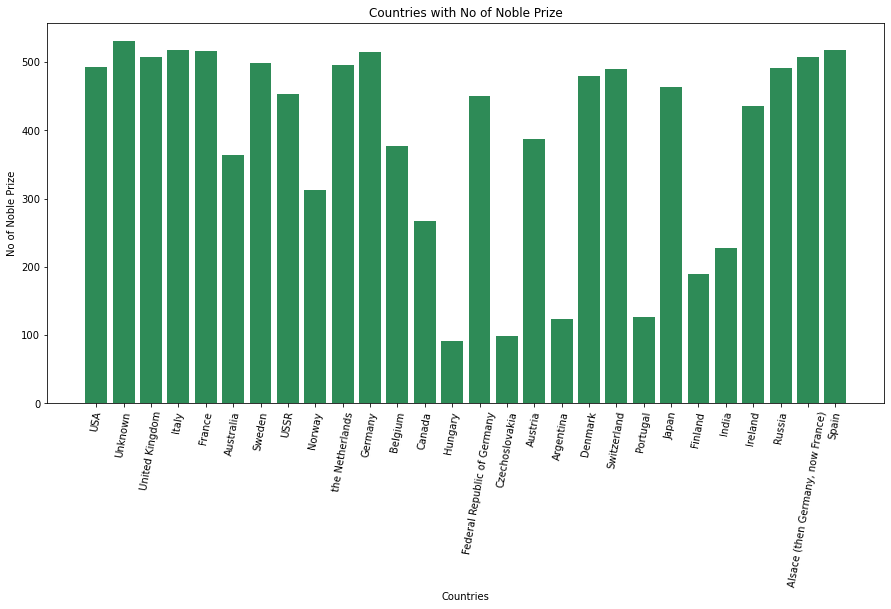

In [96]:
plt.figure(figsize=(15,7))
plt.xlabel("Countries")
plt.ylabel("No of Noble Prize")
plt.title("Countries with No of Noble Prize")
plt.bar(countries,no_of_prizes,color='seagreen')
plt.xticks(rotation=80)
plt.show()